In [29]:
#%matplotlib Tk
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
from matplotlib.transforms import Bbox
from rydbperc import ryperc
from scipy.stats import poisson

In [2]:
N_atoms = 1500
rescaling_factor = 1.3

In [11]:
cloud = ryperc.cluster3D(size=N_atoms, is_2D=True, distribution="gaussian", MOT_radius=0.14)
cloud.set_evolution_parameters(
    shell_radius=0.07*rescaling_factor,
    shell_delta=0.01*rescaling_factor,
    blokade_radius=0.2*rescaling_factor,
    p_spont_exct=0.1/N_atoms,
    p_emission=0.18,
    p_fac=0.01
)

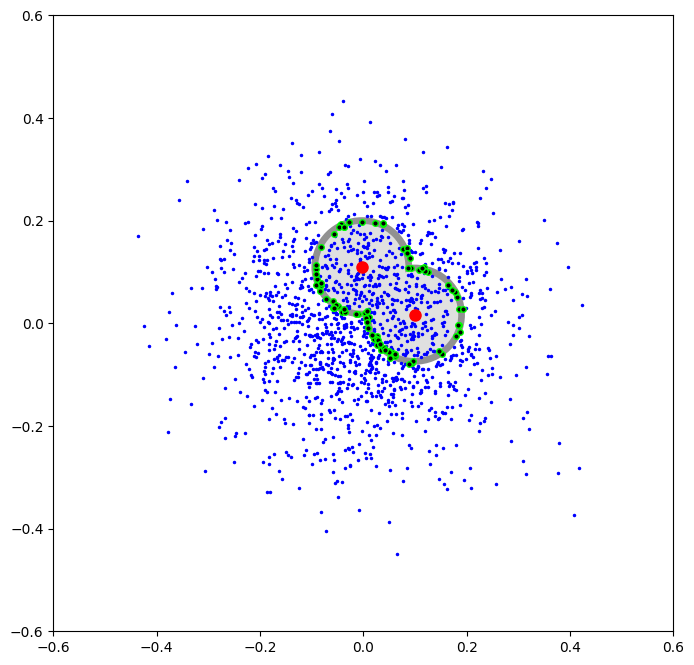

In [12]:
N_steps = 200
excitations = []
ims1 = []
size = (8,8)

fig1 = plt.figure(figsize=size)

for step in range(N_steps):
    cloud.evolution_step()
    excitations.append(len(cloud.cluster_excited))

    ims1_ = cloud.show2D(return_=True)
    ims1.append(ims1_)

    #plt.clf()

    #ax2 = plt.subplot(1,1,1)
    #ax2.set_position([0.3,0.55,0.4,0.1])

    #fig.subplots_adjust(hspace=0.5)
    #ims2_ = []
    #if len(excitations)>100:
    #    ims2_ += ax2.plot(excitations[-100:-1], c="red")
    #else:
    #    ims2_ += ax2.plot(excitations, c="red")

    #ims2.append(ims2_)

ani1 = ArtistAnimation(fig1, ims1, interval=10, blit=True, repeat_delay=10)

ani1.save('absorbing_phase_2d__.mp4', dpi=280)

#plt.cla()
#plt.clf()
#plt.figure(figsize=(8,4))
#plt.plot(excitations, c="red")
#plt.show()

<Figure size 640x480 with 0 Axes>

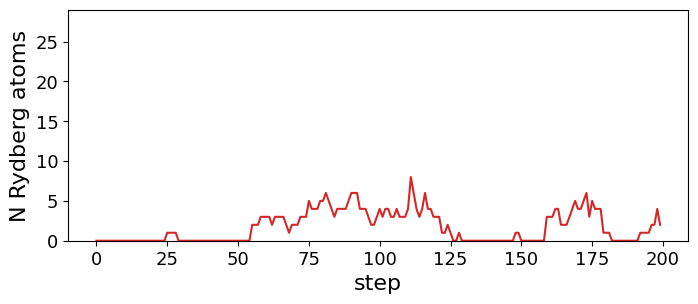

In [13]:
plt.cla()
plt.clf()
plt.figure(figsize=(8,3))
plt.plot(excitations, c="tab:red")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("N Rydberg atoms", fontsize=16)
plt.xlabel("step", fontsize=16)
plt.ylim([0,29])

plt.savefig('N_rydberg_evolution_absorbing_phase_.png', dpi=300)
plt.show()

In [46]:
N_steps = 200
N_atoms = 1500
times_reps = 10
rescaling_factor = 1.4
all_exc = []

for i in range(times_reps):
    excitations = []
    cloud = ryperc.cluster3D(size=N_atoms, is_2D=True)
    cloud.set_evolution_parameters(
        shell_radius=0.07*rescaling_factor,
        shell_delta=0.01*rescaling_factor,
        blokade_radius=0.2*rescaling_factor,
        p_spont_exct=0.1/N_atoms,
        p_emission=0.1,
        p_fac=0.05
    )
    for step in range(N_steps):
        cloud.evolution_step()
        excitations.append(len(cloud.cluster_excited))

    all_exc.append(excitations)


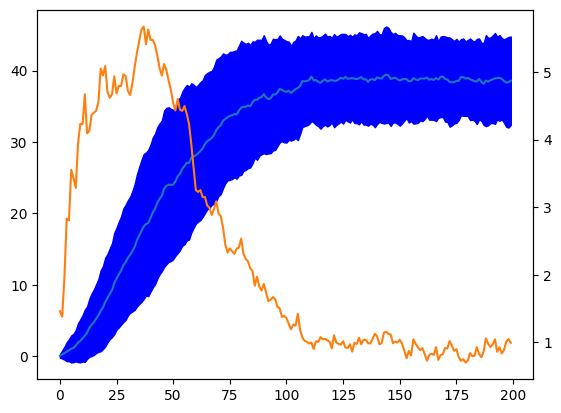

In [52]:
all_exc = np.asarray(all_exc)

means = np.mean(all_exc, axis=0)
stds = np.std(all_exc, axis=0)

x = np.arange(0, N_steps, 1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, means)

down_ = [means[i]-stds[i] for i in range(N_steps)]
top_ = [means[i]+stds[i] for i in range(N_steps)]

Qs_ = [stds[i]**2/means[i] for i in range(N_steps)]

ax2.plot(x, Qs_, color="tab:orange")
ax1.fill_between(x, top_, down_, color="blue")
plt.show()

# 3D

In [59]:
N_steps = 300
N_atoms = 7000
times_reps = 10
rescaling_factor = 1.4
all_exc = []

for i in range(times_reps):
    excitations = []
    cloud = ryperc.cluster3D(size=N_atoms, is_2D=False)
    cloud.set_evolution_parameters(
        shell_radius=0.07*rescaling_factor,
        shell_delta=0.01*rescaling_factor,
        blokade_radius=0.2*rescaling_factor,
        p_spont_exct=0.1/N_atoms,
        p_emission=0.1,
        p_fac=0.05
    )
    for step in range(N_steps):
        cloud.evolution_step()
        excitations.append(len(cloud.cluster_excited))

    all_exc.append(excitations)

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_49324/3826997753.py:16: RuntimeWarning: invalid value encountered in double_scalars
  Qs_ = [stds[i]**2/means[i] for i in range(N_steps)]


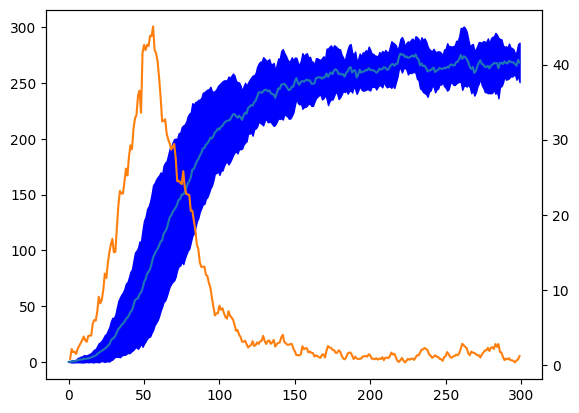

In [60]:
all_exc = np.asarray(all_exc)

means = np.mean(all_exc, axis=0)
stds = np.std(all_exc, axis=0)

x = np.arange(0, N_steps, 1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, means)

down_ = [means[i]-stds[i] for i in range(N_steps)]
top_ = [means[i]+stds[i] for i in range(N_steps)]

Qs_ = [stds[i]**2/means[i] for i in range(N_steps)]

ax2.plot(x, Qs_, color="tab:orange")
ax1.fill_between(x, top_, down_, color="blue")
plt.show()

# PLOT distribution

In [45]:
N_atoms = 7000
N_steps = 50
rescaling_factor = 1.4
n_sample = 10000

excitations = []
for _ in range(n_sample):

    cloud = ryperc.cluster3D(size=N_atoms, is_2D=False)
    cloud.set_evolution_parameters(
        shell_radius=0.07*rescaling_factor,
        shell_delta=0.01*rescaling_factor,
        blokade_radius=0.2*rescaling_factor,
        p_spont_exct=0.1/N_atoms,
        p_emission=0.1,
        p_fac=0.05
    )
    for step in range(N_steps):
        cloud.evolution_step()
    
    excitations.append(len(cloud.cluster_excited))

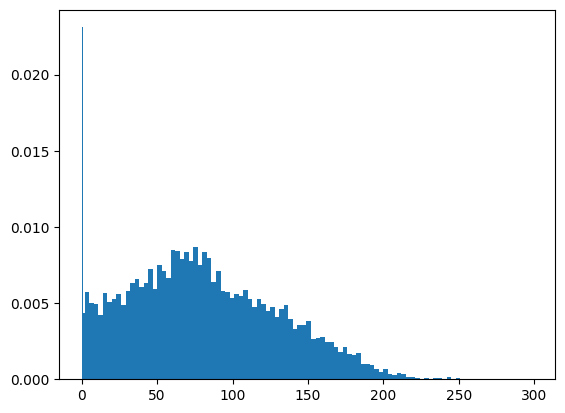

In [56]:
bins = np.array([0,0.9] + list(np.arange(2,300,3)))
N_s_p = poisson.pmf(bins, np.mean(excitations))
#plt.plot(bins, N_s_p, color="black", ls="--", marker=".", alpha=0.5)

plt.hist(excitations, bins=bins, density=True)
plt.show()

In [64]:
3/0.2

15.0

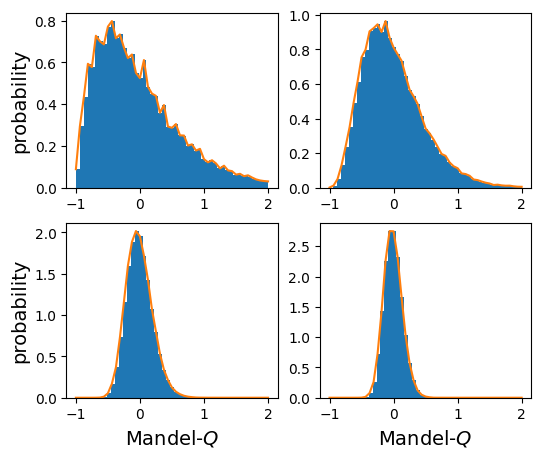

In [120]:
N_meas_s = [5, 10, 50, 100]

plt.figure(figsize=(6,5))

for i, N_meas in enumerate(N_meas_s):

    reps = 100000
    N_bins = 50

    means = np.linspace(0, 10, 10)
    Qs_ = []

    mean = 10

    for _ in range(reps):
        exp = np.random.poisson(mean, size=N_meas)
        Qs_.append(std__(exp)**2/np.mean(exp)-1)

    plt.subplot(2,2,i+1)

    g=plt.hist(Qs_, bins=np.linspace(-1,2,N_bins), density=True)
    plt.plot(np.linspace(-1,2,N_bins-1), g[0])

    if i > 1:
        plt.xlabel(r"Mandel-$Q$", fontsize=14)

    if i == 0 or i == 2:
        plt.ylabel(r"probability", fontsize=14)

#plt.savefig('Q_for_different_reps.png', dpi=300)
plt.show()


In [88]:
dat = [1,2]
np.std(dat)

0.5

In [89]:
std__(dat)

0.7071067811865476

In [87]:
def std__(data):
    m = np.mean(data)
    s = 0
    for x in data:
        s += (x-m)**2
    return np.sqrt(s/(len(data)-1))